In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv",)
df.sample(3)


RowNumber  CustomerId       Surname  CreditScore Geography  Gender  Age  \
8861       8862    15761713     Johnstone          678    France  Female   43   
671         672    15674991           Kao          667    France    Male   42   
9679       9680    15605067  Nwachinemelu          472    France    Male   19   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
8861       7  178074.33              1          0               0   
671        9       0.00              2          0               1   
9679       9       0.00              2          1               0   

      EstimatedSalary  Exited  
8861        110405.90       0  
671          58137.42       0  
9679          3453.40       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
stats_summary = df.describe().loc[["mean","std","25%","50%","75%"]]
stats_summary

RowNumber    CustomerId  CreditScore        Age    Tenure  \
mean  5000.50000  1.569094e+07   650.528800  38.921800  5.012800   
std   2886.89568  7.193619e+04    96.653299  10.487806  2.892174   
25%   2500.75000  1.562853e+07   584.000000  32.000000  3.000000   
50%   5000.50000  1.569074e+07   652.000000  37.000000  5.000000   
75%   7500.25000  1.575323e+07   718.000000  44.000000  7.000000   

            Balance  NumOfProducts  HasCrCard  IsActiveMember  \
mean   76485.889288       1.530200    0.70550        0.515100   
std    62397.405202       0.581654    0.45584        0.499797   
25%        0.000000       1.000000    0.00000        0.000000   
50%    97198.540000       1.000000    1.00000        1.000000   
75%   127644.240000       2.000000    1.00000        1.000000   

      EstimatedSalary    Exited  
mean    100090.239881  0.203700  
std      57510.492818  0.402769  
25%      51002.110000  0.000000  
50%     100193.915000  0.000000  
75%     149388.247500  0.000000

In [ ]:
df['Surname'].value_counts().count()

np.int64(2932)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


fig = make_subplots(rows=4, cols=3, subplot_titles=stats_summary.columns)

for i, column in enumerate(stats_summary.columns):
    row_num = i // 3 + 1
    col_num = i % 3 + 1

    # Select column statistics
    column_stats = stats_summary[column]

    # Add bar trace to the subplot
    fig.add_trace(
        go.Bar(
            x=column_stats.index,
            y=column_stats.values,
            texttemplate='%{y:.2s}',
            textposition='outside',
        ),
        row=row_num,
        col=col_num,
    )

fig.update_layout( height=300 * 4, width=900, title_text="Descriptive_Statistics")
fig.show()

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
columns = ["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]

fig = make_subplots(rows = 4, cols = 3,subplot_titles=columns)

for i,column in enumerate(columns):
  row_num =  i //3  +1
  col_num = i % 3 + 1

  fig.add_trace(
      go.Box(
          y = df[column]
      ),
      row = row_num, col = col_num
  )

fig.update_layout(height = 300 * 4, width = 1200, title_text = "Box_plots")

<Axes: ylabel='count'>

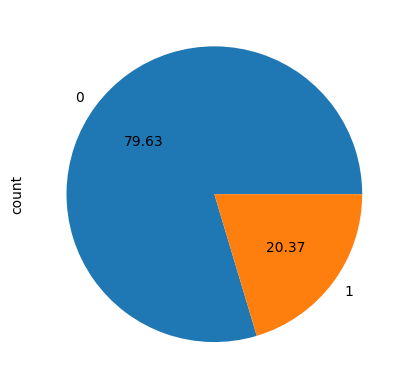

In [ ]:
df["Exited"].value_counts().plot(kind="pie",autopct="%.2f" )

<Axes: ylabel='count'>

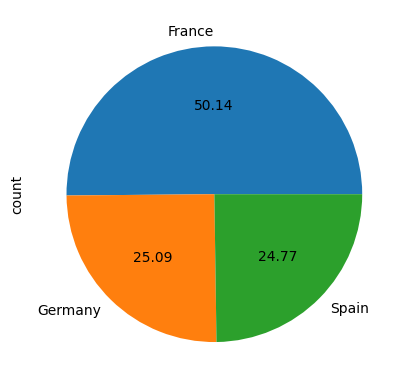

In [ ]:
df["Geography"].value_counts().plot(kind="pie",autopct="%.2f")

In [ ]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

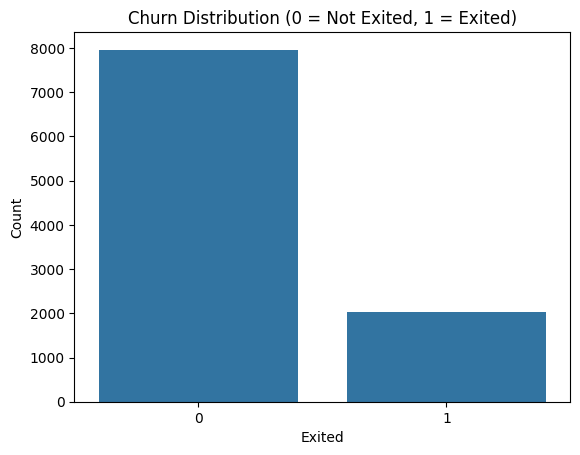

In [ ]:
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution (0 = Not Exited, 1 = Exited)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

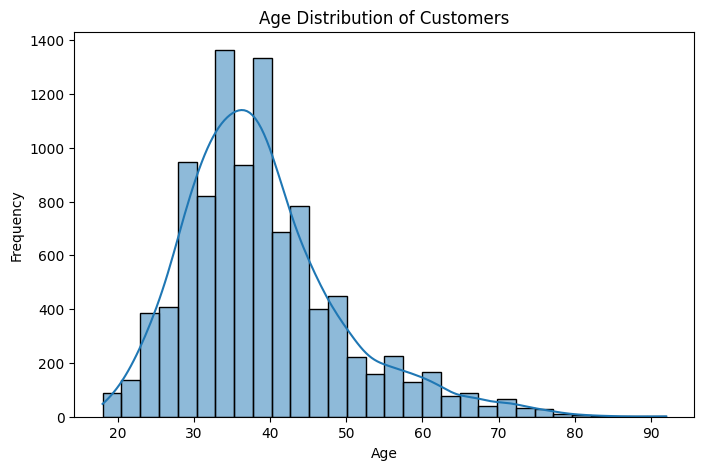

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

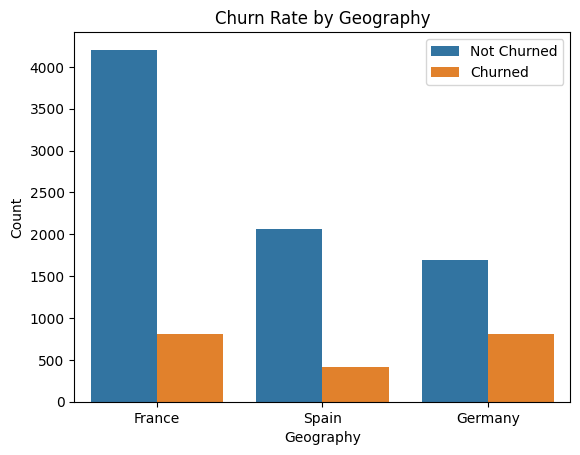

In [ ]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])
plt.show()

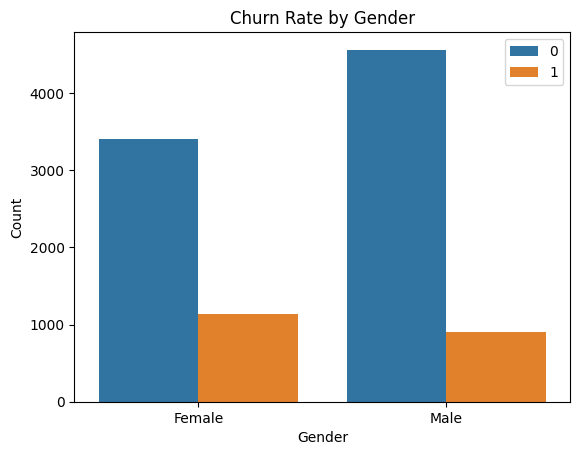

In [ ]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

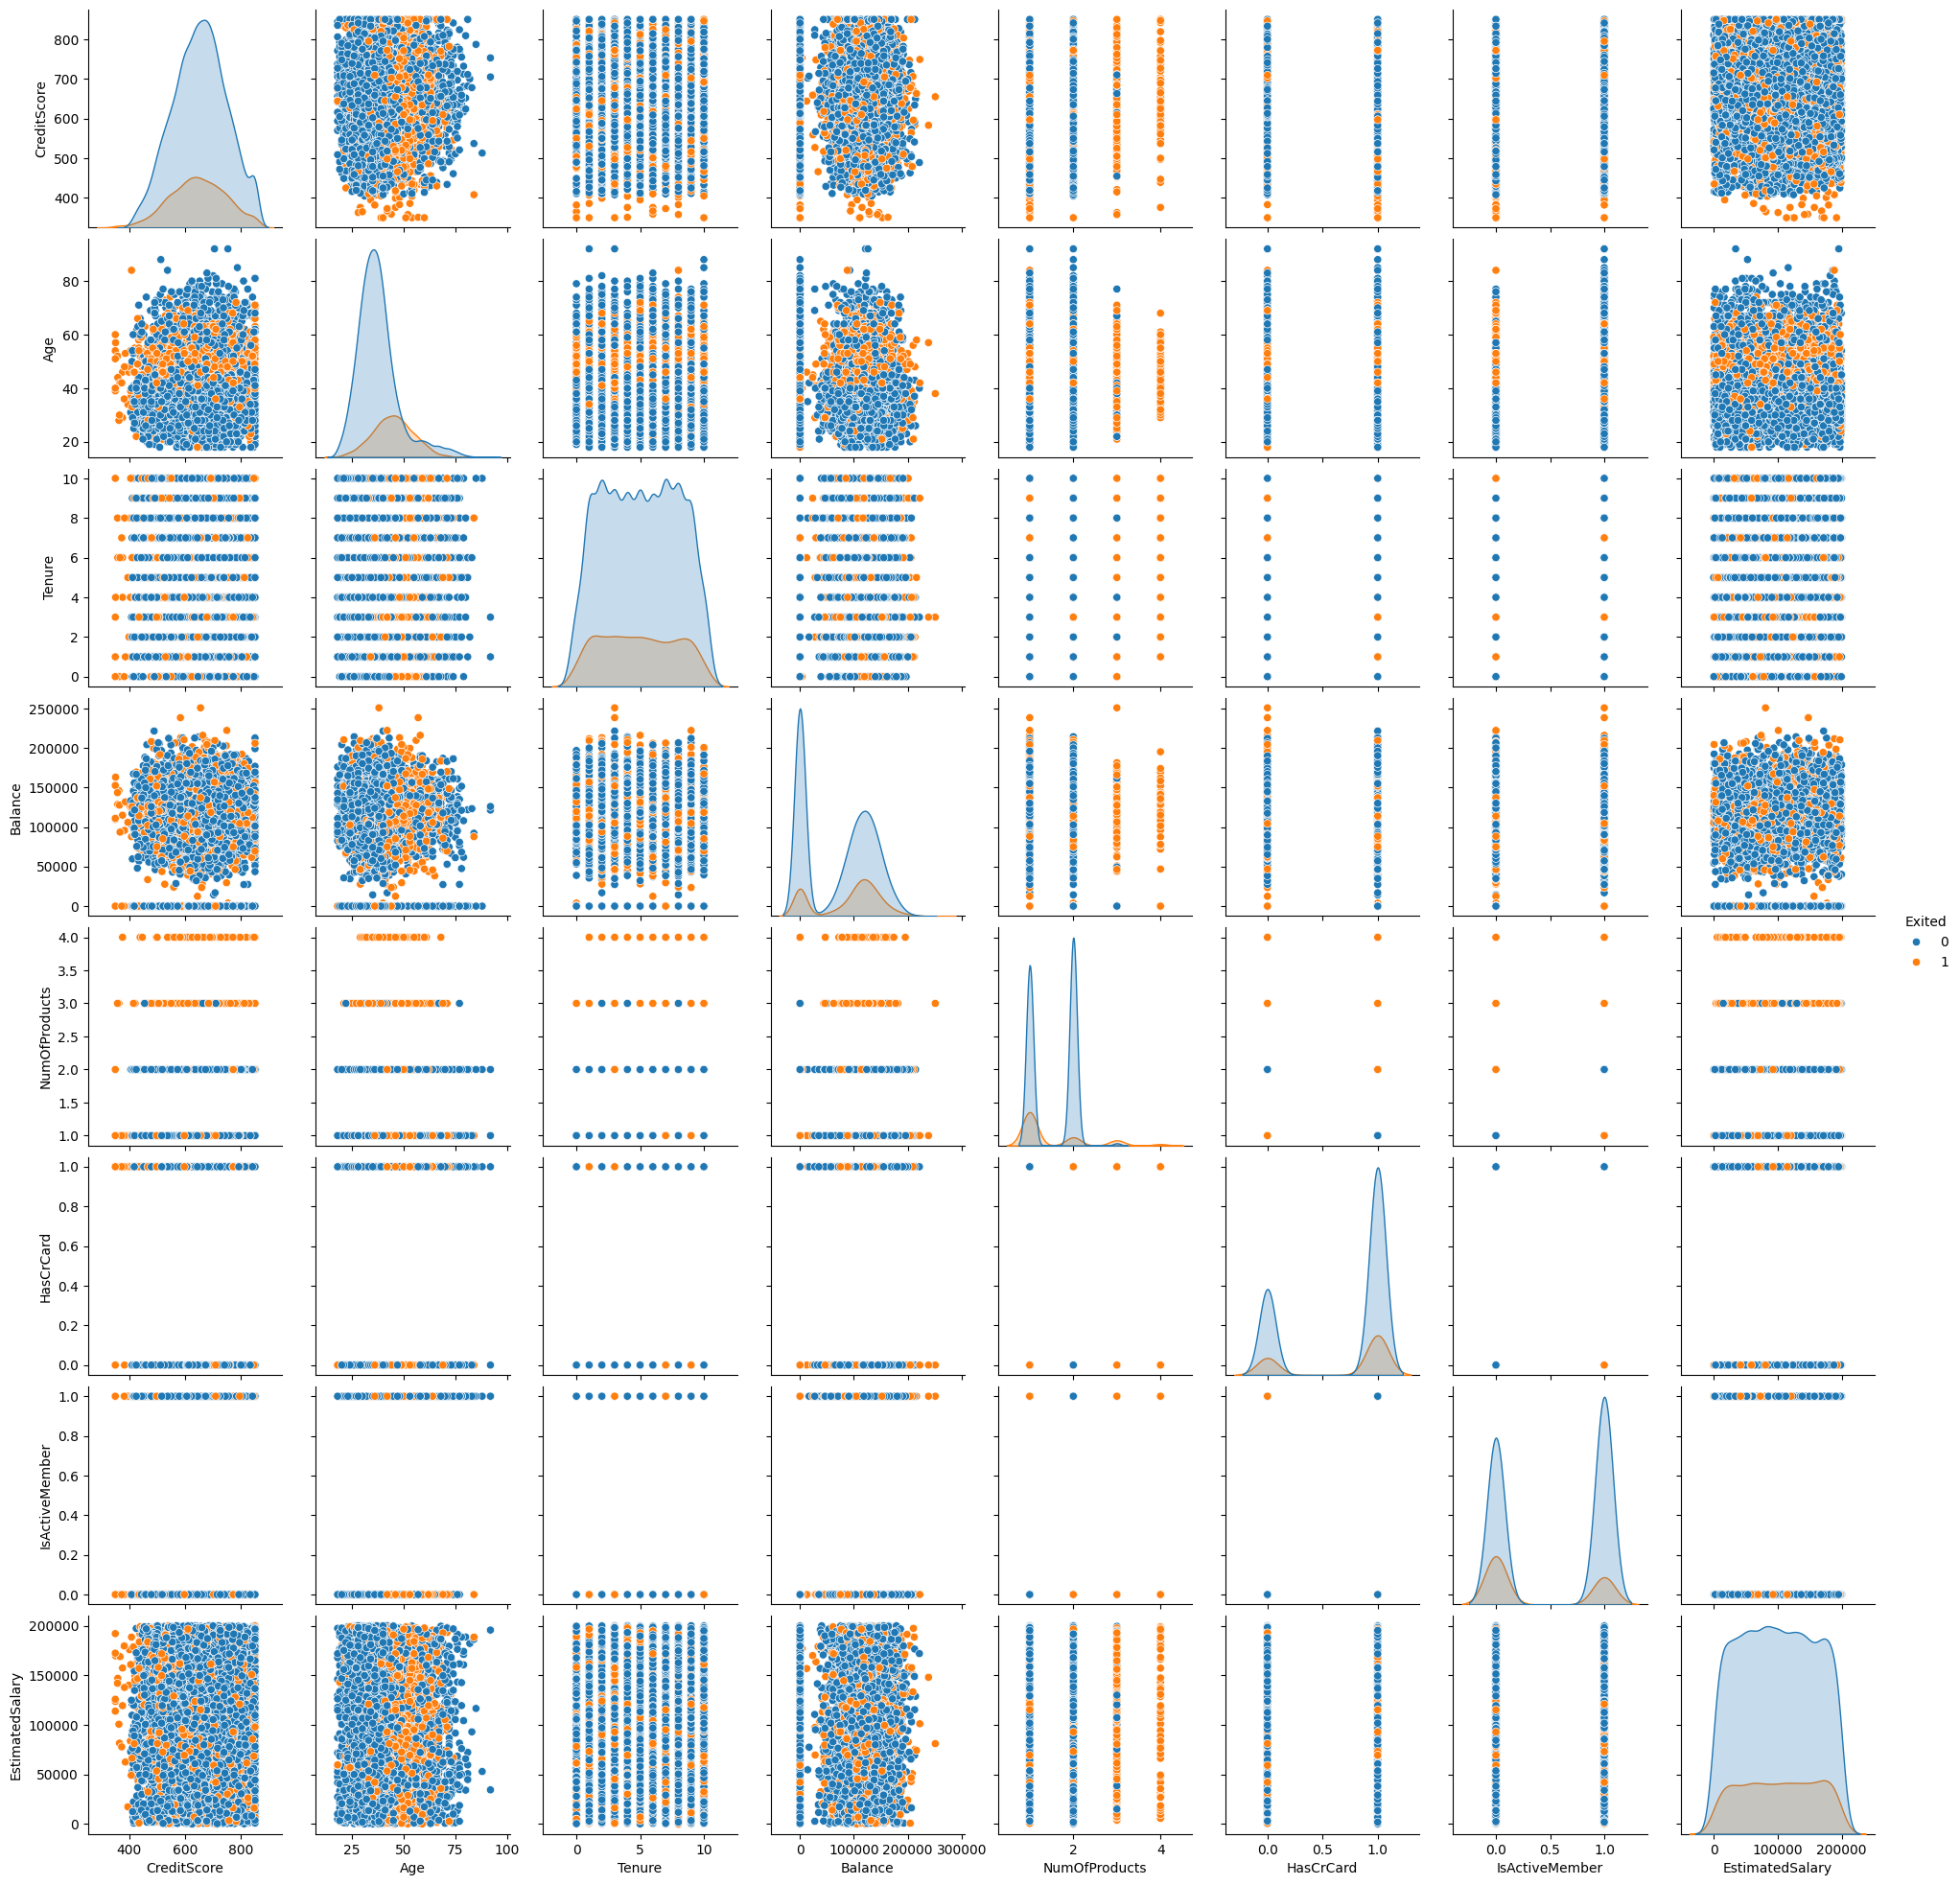

In [ ]:
columns = ["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]
sns.pairplot(df[columns], hue="Exited")
plt.show()

<Axes: >

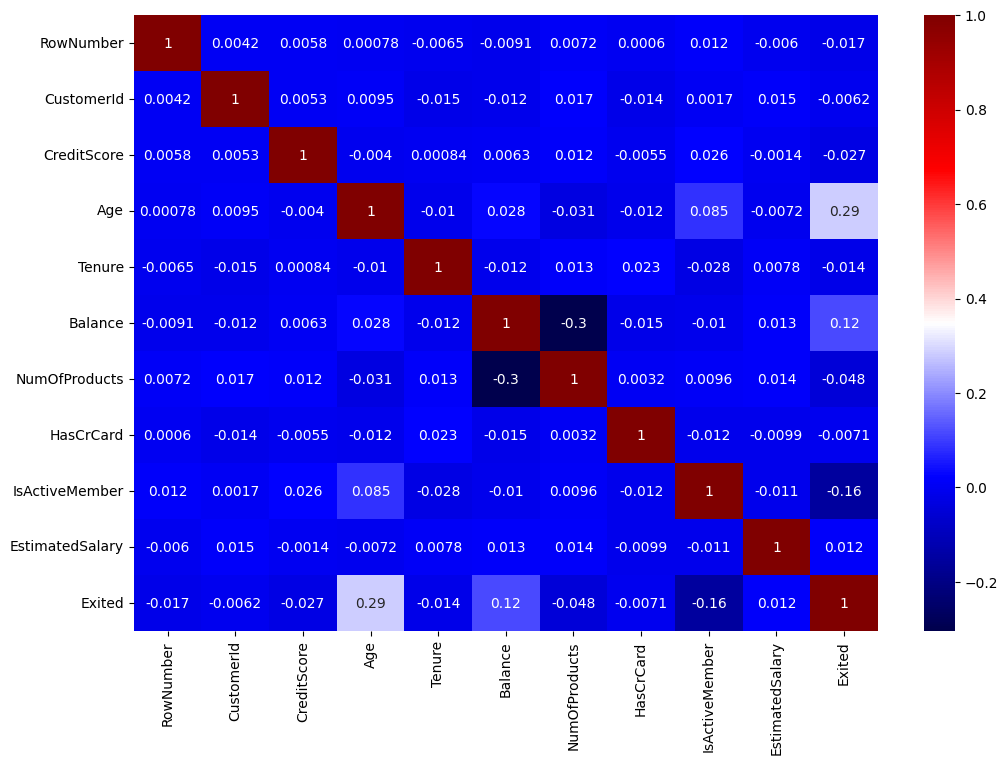

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True,cmap='seismic')

In [ ]:

df_encoded = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True, dtype=int)

In [ ]:
df_encoded.columns = df_encoded.columns.str.strip()

In [ ]:
df_encoded.drop(labels=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [ ]:
X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

In [ ]:
df_encoded.head(3)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0

In [ ]:
X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape, y_train_resampled.shape)



(12740, 11) (12740,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_best = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=15,
    class_weight='balanced',
    random_state=42
)

rf_best.fit(X_train_scaled, y_train_resampled)

# Predict
y_probs_rf = rf_best.predict_proba(X_test_scaled)[:, 1]

# Threshold tuning
threshold = 0.4
y_pred_rf_best = (y_probs_rf > threshold).astype(int)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report

print("Random Forest Accuracy (best params):", accuracy_score(y_test, y_pred_rf_best))
print(classification_report(y_test, y_pred_rf_best))


Random Forest Accuracy (best params): 0.7735
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.46      0.74      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



In [ ]:
import joblib

joblib.dump(rf_best, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['churn_model.pkl']